## 第2章 感知机

感知机是一个二分类的线性模型，其输入为实例的特征向量，输出为实例的类别，取+1和-1二值。

感知机的模型如下：  
                   $f(x)=sign(w*x+b)$  
损失函数为：  
                  $L(w,b)=-\Sigma{y_{i}(w*x_{i}+b)}$
 
 ---

#### 算法

随即梯度下降法 Stochastic Gradient Descent

随机抽取一个误分类点使其梯度下降。

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

当实例点被误分类，即位于分离超平面的错误侧，则调整w, b的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类

这里拿出鸢尾花数据集中的两个特征进行分析

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
导入鸢尾花数据库
'''
#这里可以通过打印load_iris(),查看数据结构，鸢尾花数据集是一个dict
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['label']=iris.target

In [3]:
#修改df的字段名称
df.columns=['sepal length','sepal width','petal length','petal width','label']
#查看label分了多少类.由结果易知，三种分类各有50个数据，由于感知机是一个二分类的模型，所以这里只取前两个标签进行分析
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [4]:
'''
只取数据的前两个特征'sepal length','sepal width',
和0,1标签生成data进行分析
'''
data=np.array(df.iloc[:100,[0,1,-1]])

In [5]:
#基于划分的结果确定X，y
X,y=data[:,:-1],data[:,-1]

In [6]:
#修改y的列标签,从0变为1
y=np.array([1 if i ==1 else -1 for i in y])

## Perceptron

In [7]:
'''
定义感知机模型
'''
class Model:
    def __init__(self):
        #这一行的意思是基于向量中特征的维度，比如这里有2个特征，维度为2.则取与特征相匹配的参数2个，初始值为[1,1]
        self.w=np.ones(len(data[0])-1,dtype=np.float32)
        self.b=0
        #定义步长为0.1
        self.l_rate =0.1
        
    def sign(self,x,w,b):
        y=np.dot(x,w)+ b
        return y
    
    #感知机计算的核心步骤
    def fit(self,X_train,y_train):
        result = False
        #统计出错样本的数量，并根据数量进行迭代，直至错误样本的数量降至0之后跳出循环
        while not result:
            wrong_count=0
            for each in range(len(X_train)):
                X=X_train[each]
                y=y_train[each]
                if y*self.sign(X,self.w,self.b) <=0:
                    self.w=self.w+self.l_rate*np.dot(y,X)
                    self.b=self.b+self.l_rate*y
                    wrong_count+=1
            if wrong_count==0:
                result=True
        return 'receptron model'
    
    def score(self):
        pass

In [8]:
perceptron=Model()
perceptron.fit(X,y)

'receptron model'

In [9]:
perceptron.w

array([  7.8, -10. ])

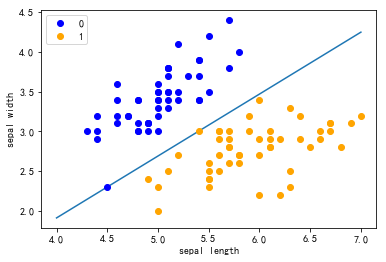

In [10]:
#随机生成花萼长度为横坐标，并以花萼宽度为纵坐标y_
#因为分界线上正好有 w*x+b=0
x_points=np.linspace(4,7,10)
y_=-(perceptron.w[0]*x_points+perceptron.b)/perceptron.w[1]

plt.plot(x_points,y_) #绘制分界线

#绘制数据点
plt.plot(data[:50,0],data[:50,1],'bo',color='blue',label='0')

plt.plot(data[50:,0],data[50:,1],'bo',color='orange',label='1')

plt.xlabel('sepal length')

plt.ylabel('sepal width')

plt.legend()

## sklearn Perceptron

如果直接调用sklearn模块，代码如下

In [11]:
from sklearn.linear_model import Perceptron

In [12]:
#调用感知机函数，并赋值
#fit_intercept为是否选择估计截距，False假设数据已经为中心了
#shuffle在每次进行完一个循环后，数据顺序是否更新，这里选择否
clf=Perceptron(fit_intercept=False,max_iter=1000,shuffle=False)
clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=False,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=False, tol=None, verbose=0, warm_start=False)

In [13]:
#显示计算得到的w的值
clf.coef_

array([[  74.6, -127.2]])

In [14]:
#显示计算得到的截距b
clf.intercept_

array([ 0.])

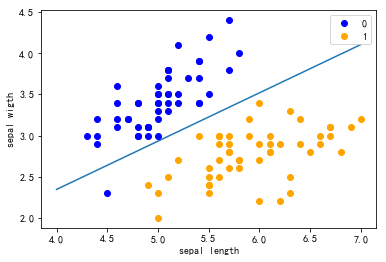

In [15]:
x_points=np.arange(4,8)
y_=-(clf.coef_[0][0]*x_points+clf.intercept_)/clf.coef_[0][1]
plt.plot(x_points,y_)

plt.plot(data[:50,0],data[:50,1],'bo',color='blue',label='0')
plt.plot(data[50:100,0],data[50:100,1],'bo',color='orange',label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal wigth')
plt.legend()